In [4]:
import pandas as pd
from tensorflow.keras.applications.vgg16 import VGG16
from tensorflow.keras.applications.vgg16 import preprocess_input
from tensorflow.keras.preprocessing.image import load_img
from tensorflow.keras.preprocessing.image import img_to_array
from tensorflow.keras.models import Model
import matplotlib.pyplot as plt

In [9]:
# Load the model
model = VGG16()

# Summary of the model
model.summary()

553467904/553467096 [==============================] - 13s 0us/step
Model: "vgg16"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 224, 224, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
___________________________________________________________

In [10]:
for layer in model.layers:
    if 'conv' not in layer.name:
        continue
    filters, bias = layer.get_weights()
    print(layer.name, filters.shape)

block1_conv1 (3, 3, 3, 64)
block1_conv2 (3, 3, 64, 64)
block2_conv1 (3, 3, 64, 128)
block2_conv2 (3, 3, 128, 128)
block3_conv1 (3, 3, 128, 256)
block3_conv2 (3, 3, 256, 256)
block3_conv3 (3, 3, 256, 256)
block4_conv1 (3, 3, 256, 512)
block4_conv2 (3, 3, 512, 512)
block4_conv3 (3, 3, 512, 512)
block5_conv1 (3, 3, 512, 512)
block5_conv2 (3, 3, 512, 512)
block5_conv3 (3, 3, 512, 512)


In [11]:
# retrieve weights from the second hidden layer
filters, bias = model.layers[1].get_weights()

In [12]:
print(filters.shape)

(3, 3, 3, 64)


In [14]:
import numpy as np

In [16]:
print(type(filters))
print(np.min(filters))
print(np.max(filters))

<class 'numpy.ndarray'>
-0.67140007
0.6085159


In [17]:
# normalize filter values to 0 - 1 so we can visualize them
f_min, f_max = filters.min(), filters.max()
filters = (filters - f_min) / (f_max - f_min)

In [19]:
print(filters.min())
print(filters.max())

0.0
1.0


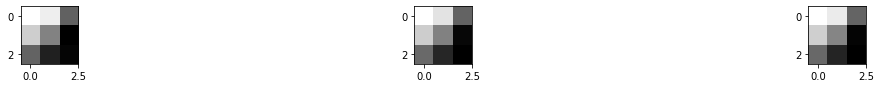

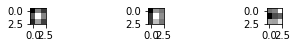

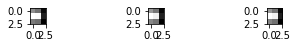

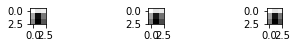

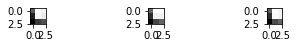

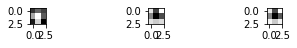

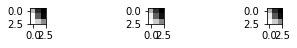

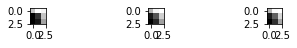

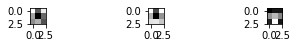

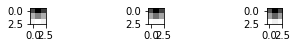

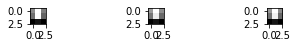

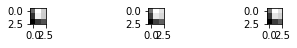

In [20]:
# visualize 6 filters out of 64 filters from 1st layer

n_filters = 12
idx = 1
fig = plt.figure(figsize=(20, 15))
for i in range(n_filters):
    # get the filters
    f = filters[:, :, :, i]
    for j in range(3):
        # subplot for 6 filters and 3 channels
        plt.subplot(n_filters,3, idx)
        plt.imshow(f[:,:,j], cmap='gray')
        idx += 1
    # plot the filters
    plt.show()

In [22]:
for i in range(len(model.layers)):
    #print(len(model.layers))
    layer = model.layers[i]
    if 'conv' not in layer.name:
        continue
    print(i, layer.name, layer.output.shape)

1 block1_conv1 (None, 224, 224, 64)
2 block1_conv2 (None, 224, 224, 64)
4 block2_conv1 (None, 112, 112, 128)
5 block2_conv2 (None, 112, 112, 128)
7 block3_conv1 (None, 56, 56, 256)
8 block3_conv2 (None, 56, 56, 256)
9 block3_conv3 (None, 56, 56, 256)
11 block4_conv1 (None, 28, 28, 512)
12 block4_conv2 (None, 28, 28, 512)
13 block4_conv3 (None, 28, 28, 512)
15 block5_conv1 (None, 14, 14, 512)
16 block5_conv2 (None, 14, 14, 512)
17 block5_conv3 (None, 14, 14, 512)


In [23]:
model.input

<KerasTensor: shape=(None, 224, 224, 3) dtype=float32 (created by layer 'input_1')>

In [25]:
model = Model(inputs=model.input, outputs=model.layers[1].output)

In [67]:
img_lab = load_img('kakdugi_lab.jpg', target_size=(224,224))

# convert the image to an array
img_lab = img_to_array(img_lab)

# expand dimensions so that it represents a single 'sample'
img_lab = np.expand_dims(img_lab, axis=0)

In [83]:
img_rgb = load_img('kakdugi_rgb.jpg', target_size=(224,224))

# convert the image to an array
img_rgb = img_to_array(img_rgb)

# expand dimensions so that it represents a single 'sample'
img_rgb = np.expand_dims(img_rgb, axis=0)

In [54]:
# print(image.min())
# print(image.max())

0.0
255.0


In [76]:
# The pixel values then need to be scaled appropriately for the VGG model
lab_image = preprocess_input(img_lab)
print(lab_image.min())
print(lab_image.max())

-415.756
-160.75601


In [84]:
# The pixel values then need to be scaled appropriately for the VGG model
rgb_image = preprocess_input(img_rgb)
print(rgb_image.min())
print(rgb_image.max())

-122.68
151.061


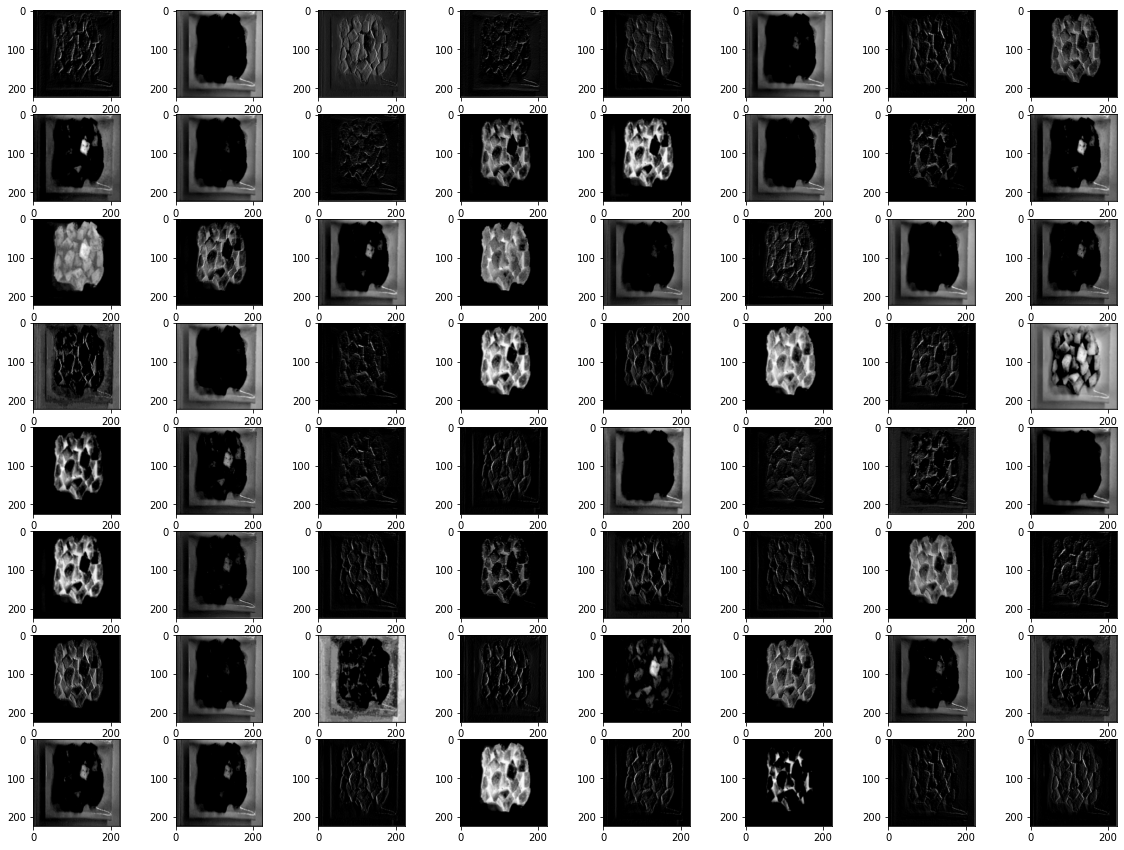

In [69]:
# calculating feature map
features = model.predict(lab_image)

plt.figure(figsize=(20, 15))
for i in range(1, features.shape[3]+1):
    plt.subplot(8,8,i)
    plt.imshow(features[0, :, :, i-1], cmap='gray')
plt.show()

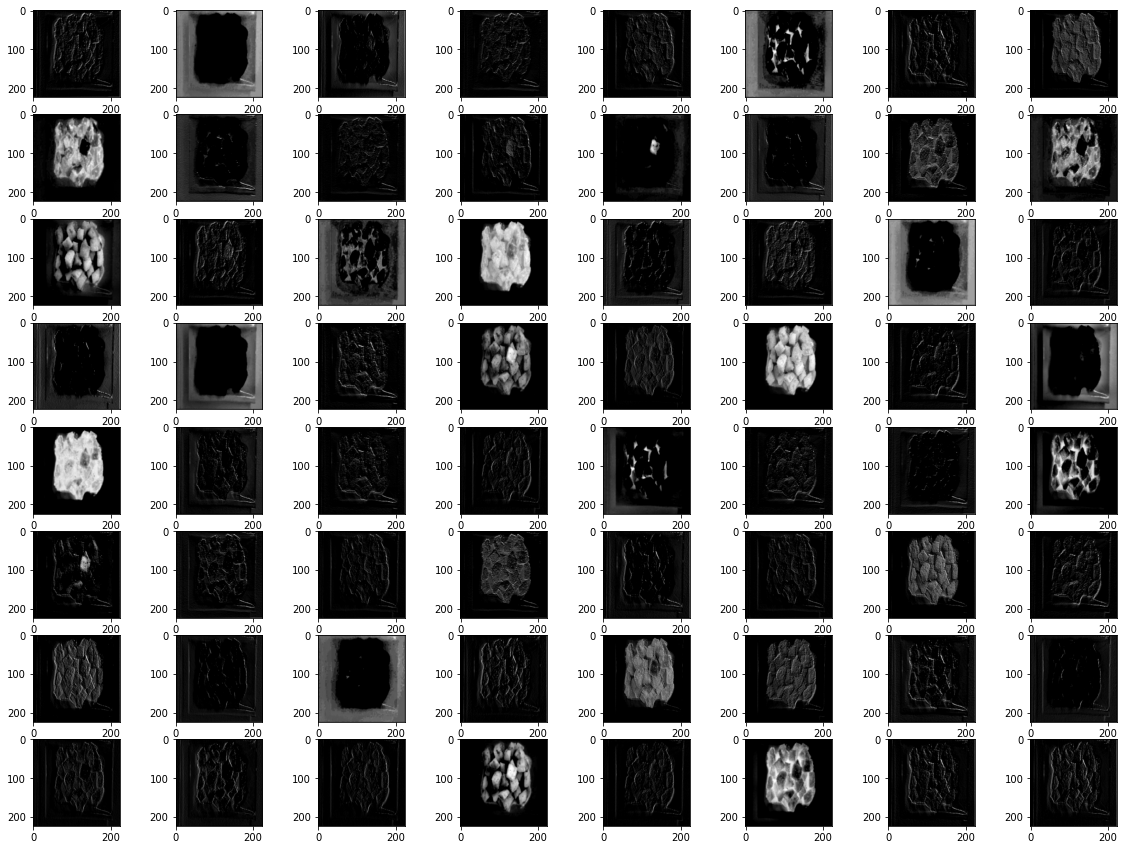

In [85]:
# calculating feature map
features = model.predict(rgb_image)

plt.figure(figsize=(20, 15))
for i in range(1, features.shape[3]+1):
    plt.subplot(8,8,i)
    plt.imshow(features[0, :, :, i-1], cmap='gray')
plt.show()

In [ ]:
### visualize features of other layers

In [37]:
model2 = VGG16()

In [45]:
model_tmp = Model(inputs=model2.input, outputs=[model2.layers[2].output, model2.layers[5].output])
model_tmp.summary()

Model: "model_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         [(None, 224, 224, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
Total params: 260,160
Trainable params: 260,160
Non-trainable params: 0
_____________________________________________________

In [40]:
blocks = [2, 5, 9, 13, 17]
outputs = [model2.layers[i].output for i in blocks]
print(outputs)
model2 = Model(inputs=model2.input, outputs=outputs)

model2.summary()

[<KerasTensor: shape=(None, 224, 224, 64) dtype=float32 (created by layer 'block1_conv2')>, <KerasTensor: shape=(None, 112, 112, 128) dtype=float32 (created by layer 'block2_conv2')>, <KerasTensor: shape=(None, 56, 56, 256) dtype=float32 (created by layer 'block3_conv3')>, <KerasTensor: shape=(None, 28, 28, 512) dtype=float32 (created by layer 'block4_conv3')>, <KerasTensor: shape=(None, 14, 14, 512) dtype=float32 (created by layer 'block5_conv3')>]
Model: "model_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         [(None, 224, 224, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
b

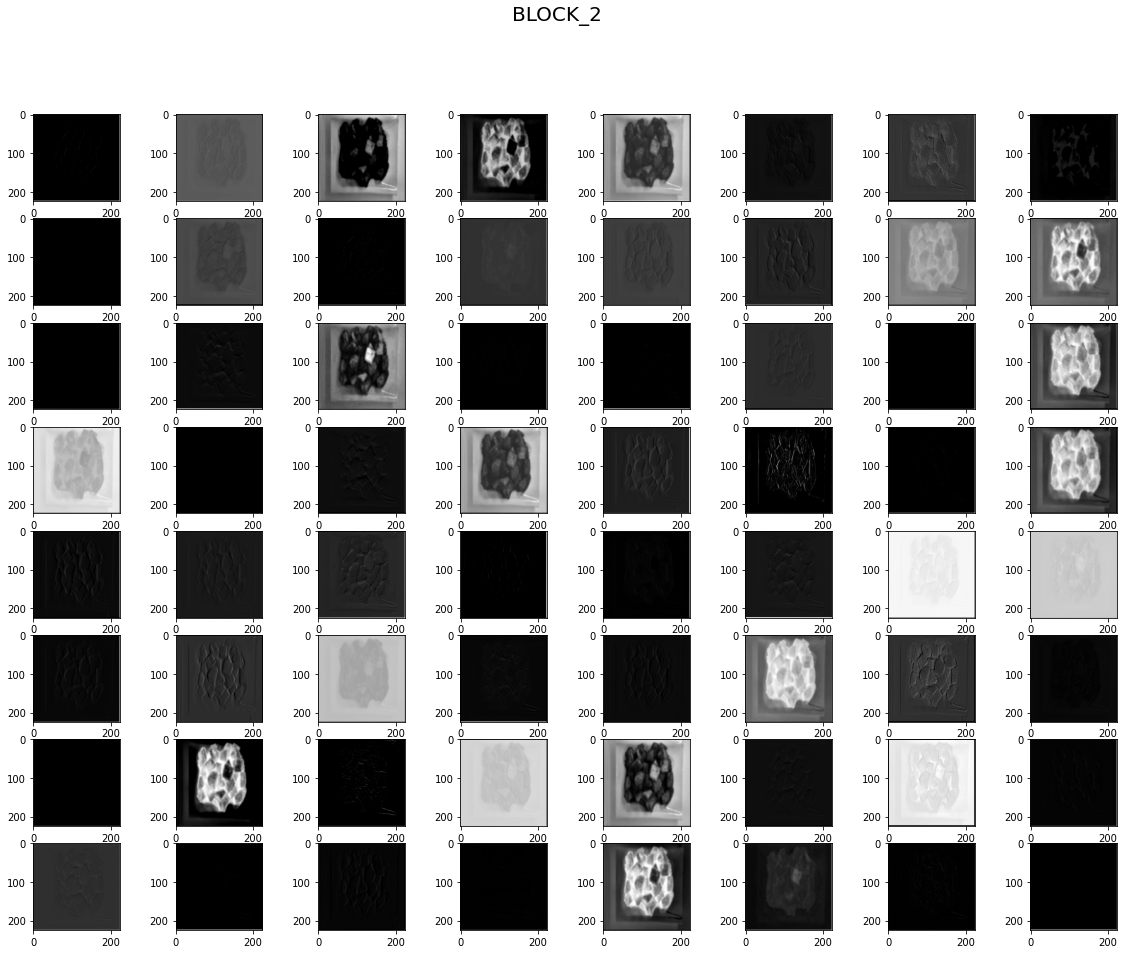

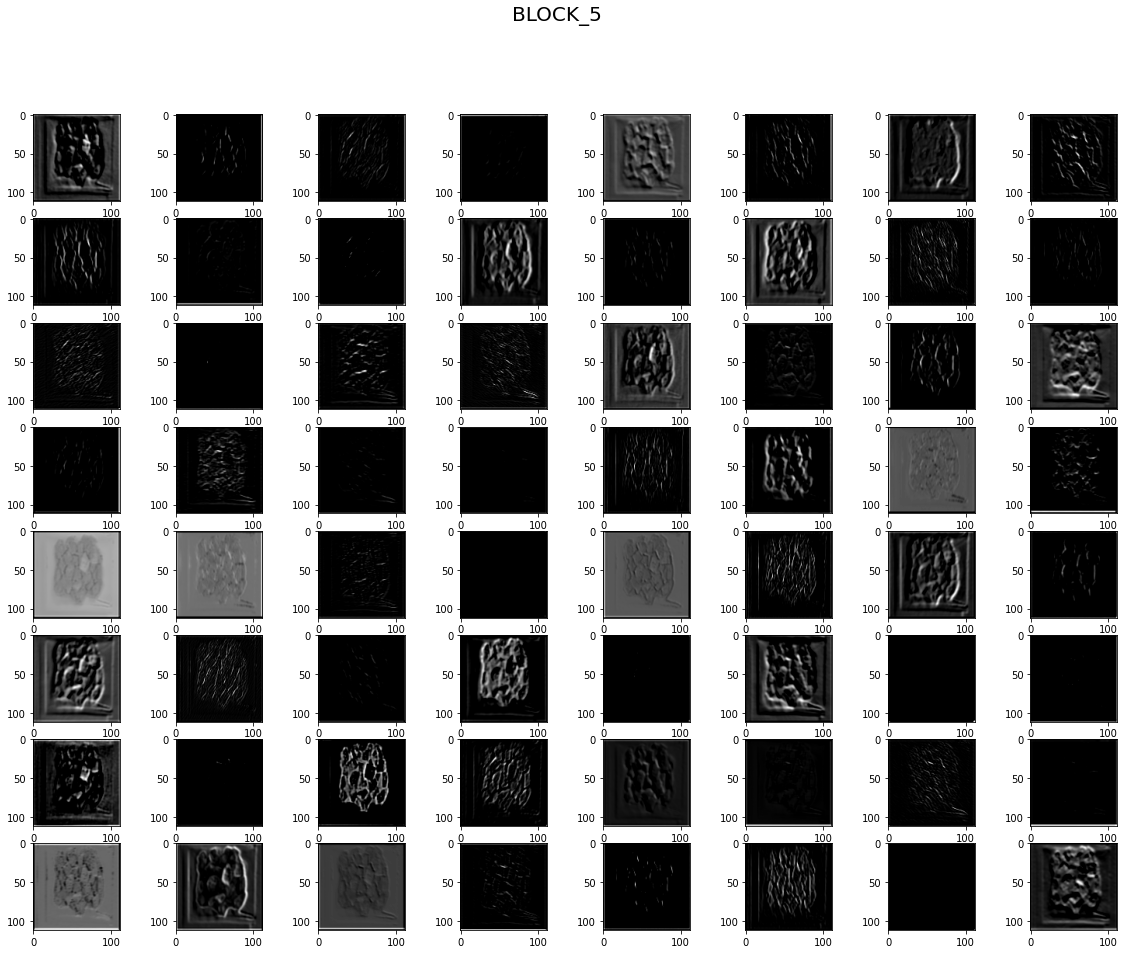

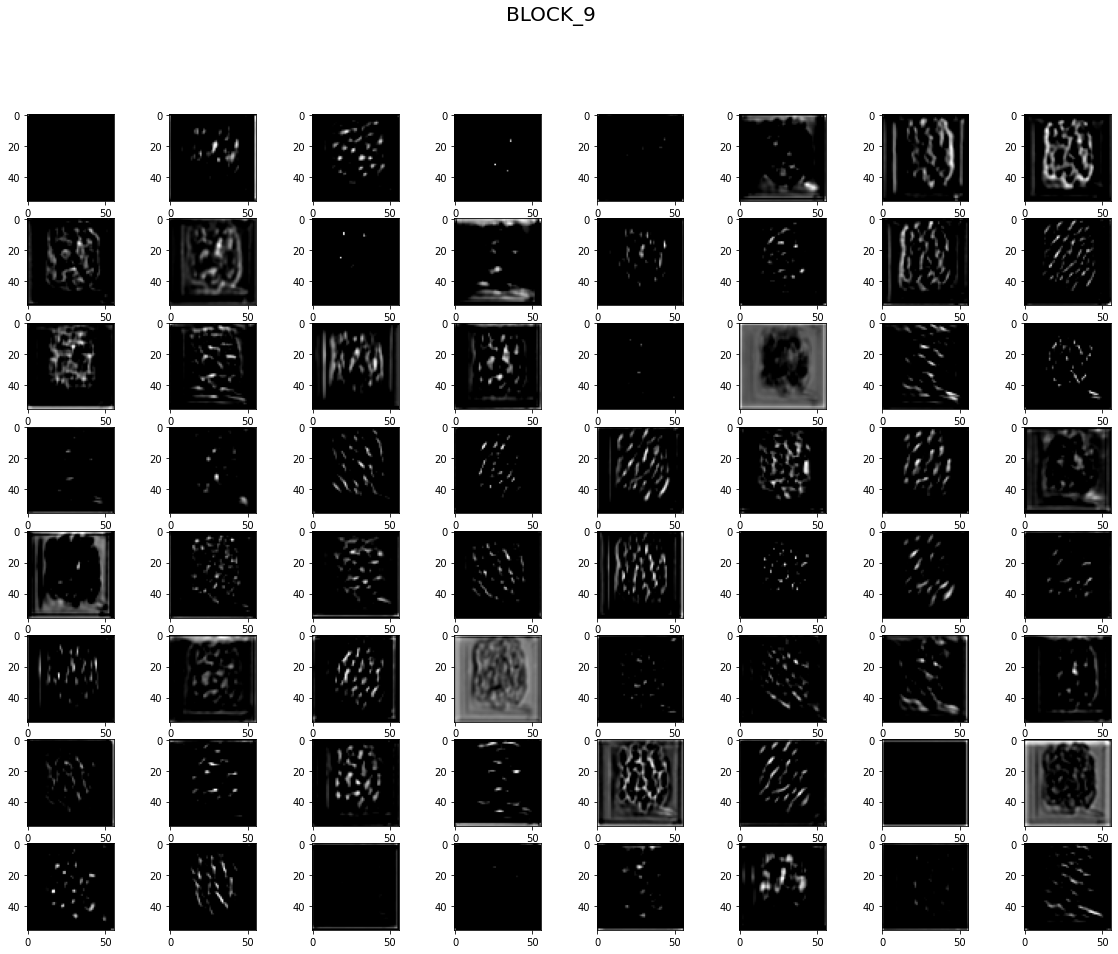

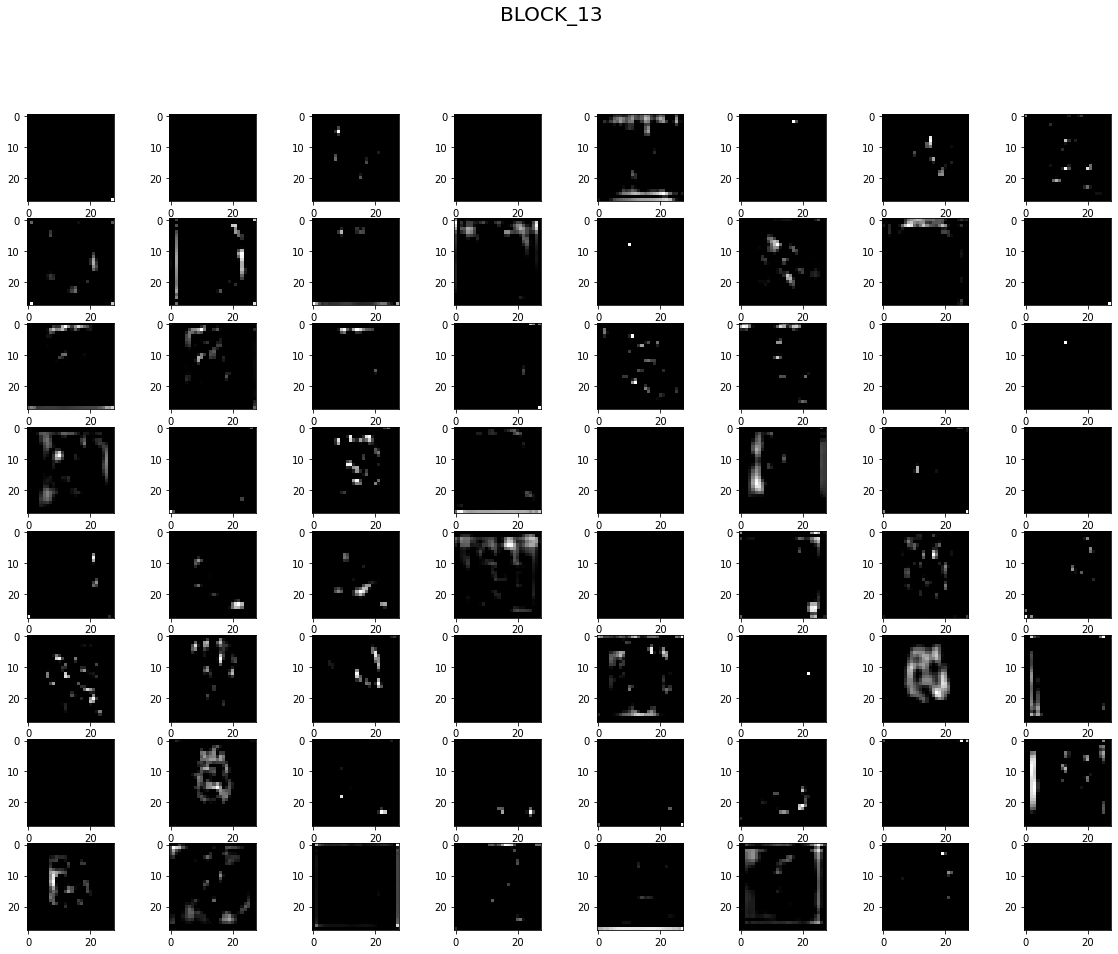

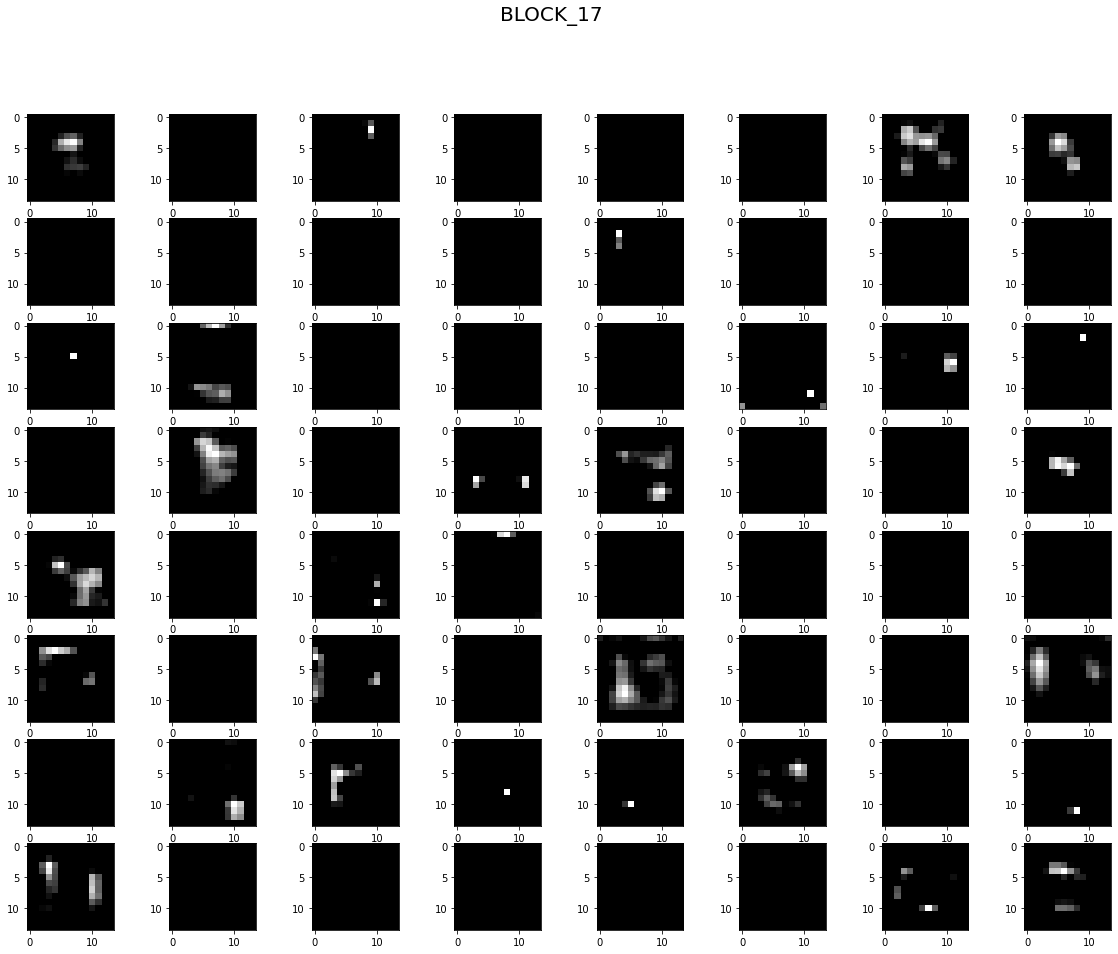

In [86]:
feature_map = model2.predict(lab_image)

for i, fmap in zip(blocks, feature_map):
    fig = plt.figure(figsize=(20,15))
    fig.suptitle(f"BLOCK_{i}", fontsize=20)
    for i in range(1, features.shape[3]+1):
        plt.subplot(8,8,i)
        plt.imshow(fmap[0, :, :, i-1], cmap='gray')
plt.show()

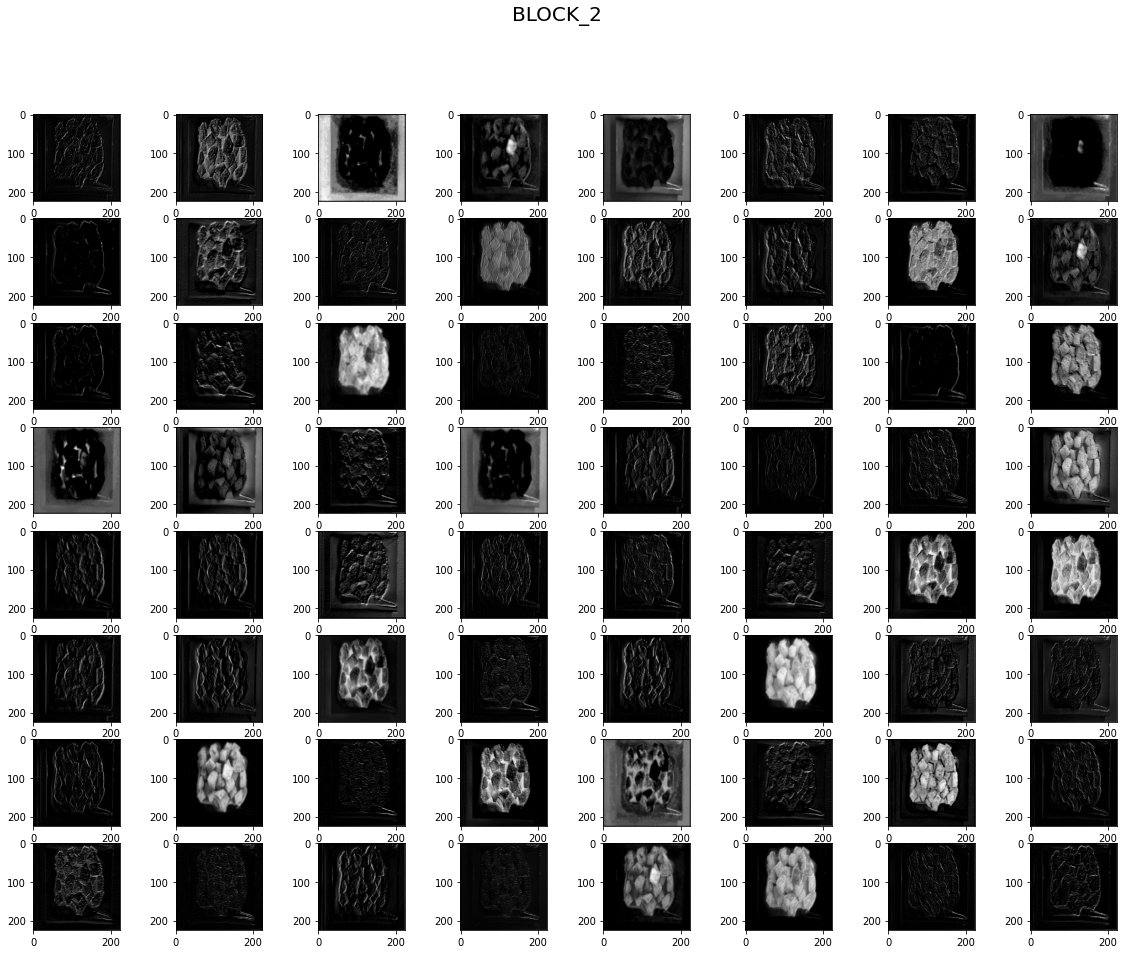

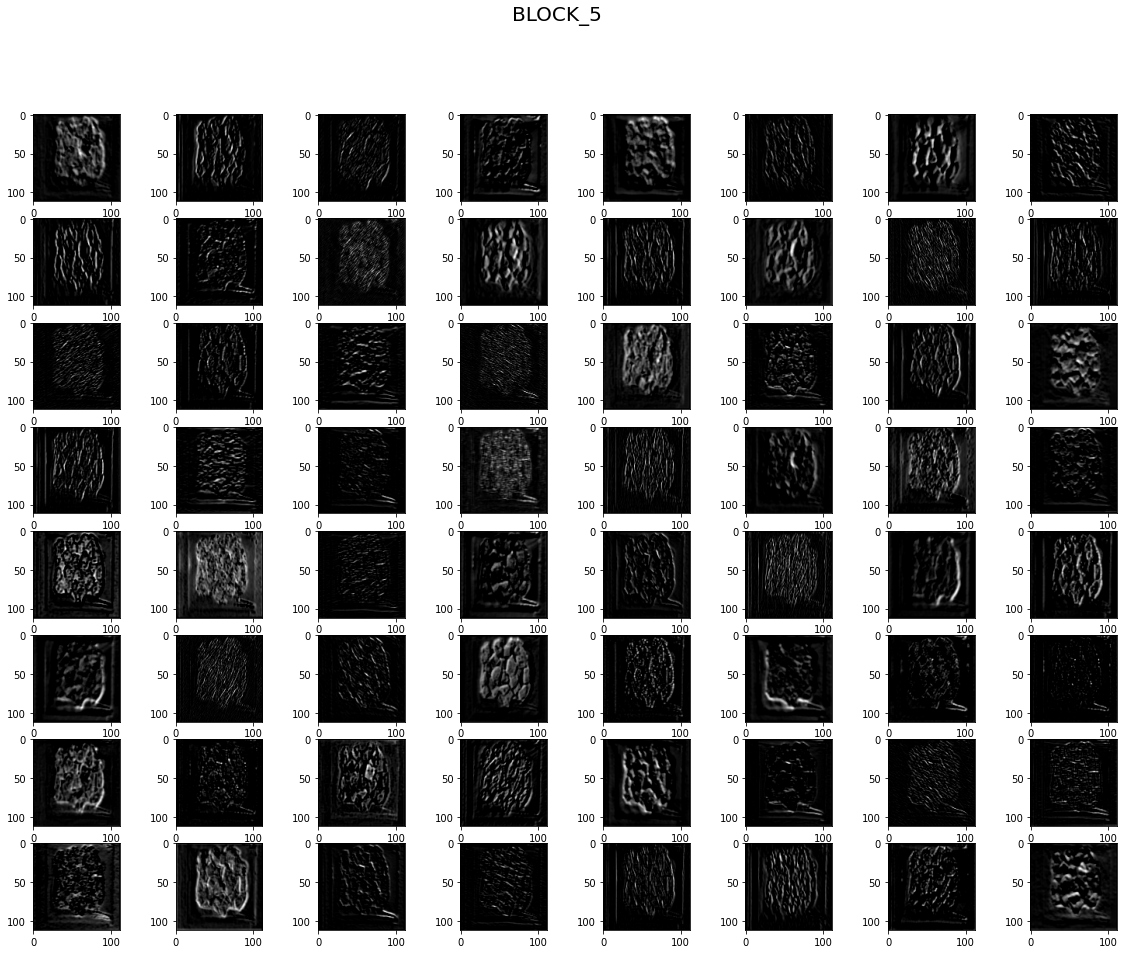

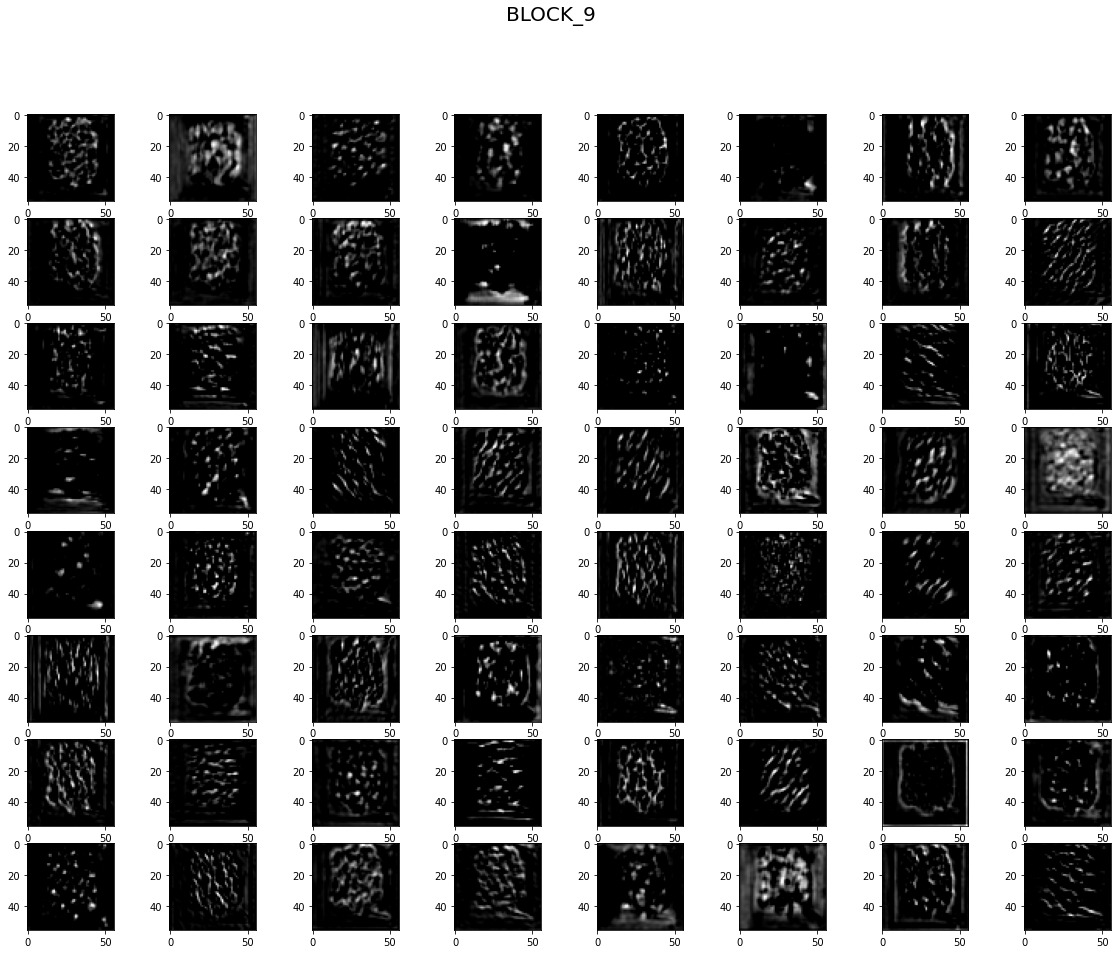

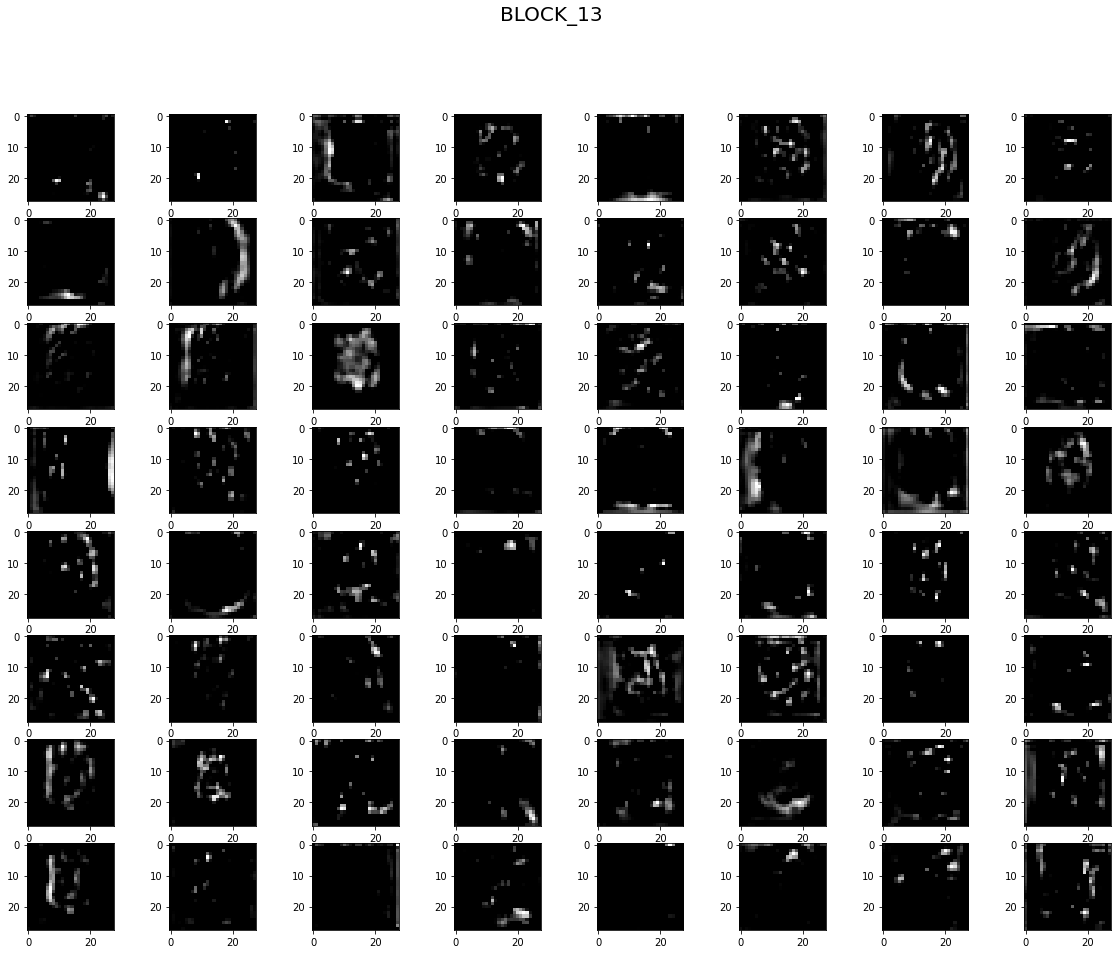

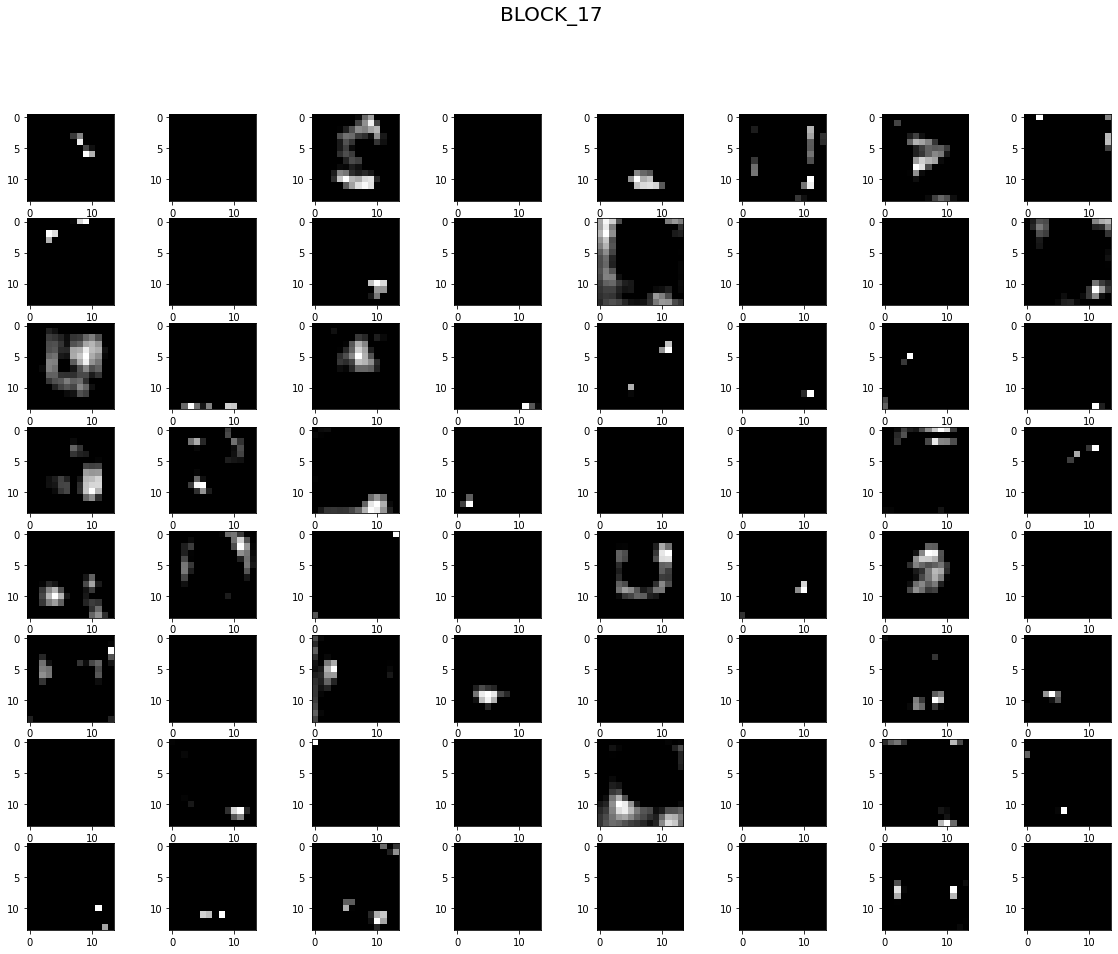

In [87]:
feature_map = model2.predict(rgb_image)

for i, fmap in zip(blocks, feature_map):
    fig = plt.figure(figsize=(20,15))
    fig.suptitle(f"BLOCK_{i}", fontsize=20)
    for i in range(1, features.shape[3]+1):
        plt.subplot(8,8,i)
        plt.imshow(fmap[0, :, :, i-1], cmap='gray')
plt.show()